=== Membuat Confusion Matrix Kasus E ===


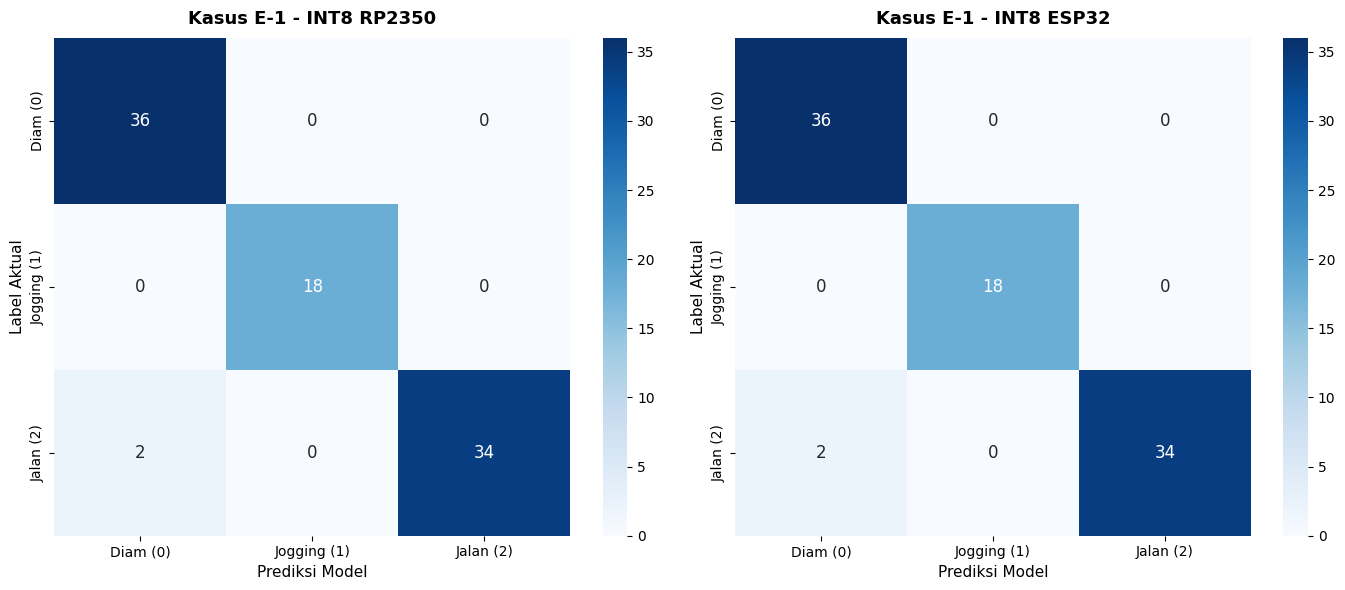

Gambar disimpan sebagai: confusion_matrices_E.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion_matrices_E():
    """
    Plot confusion matrix hanya untuk Kasus E (HAR - 3 Kelas)
    """
    files = [
        ('E_1_I_RP2350.xlsx', 'INT8 RP2350'),
        ('E_1_I_ESP32.xlsx', 'INT8 ESP32')
    ]
    labels = [0, 1, 2]
    class_names = ['Diam (0)', 'Jogging (1)', 'Jalan (2)']
    actual_col = 'Actual'
    pred_col = 'Pred'
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    for idx, (file_path, mcu_name) in enumerate(files):
        ax = axes[idx]
        try:
            df = pd.read_excel(file_path)
            df[actual_col] = df[actual_col].astype(int)
            df[pred_col] = df[pred_col].astype(int)
            y_true = df[actual_col]
            y_pred = df[pred_col]
            cm = confusion_matrix(y_true, y_pred, labels=labels)
            
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                        xticklabels=class_names, yticklabels=class_names,
                        annot_kws={"size": 12}, cbar=True)
            ax.set_title(f"Kasus E-1 - {mcu_name}", fontsize=13, fontweight='bold', pad=10)
            ax.set_xlabel('Prediksi Model', fontsize=11)
            ax.set_ylabel('Label Aktual', fontsize=11)
        except FileNotFoundError:
            ax.text(0.5, 0.5, f'File tidak ditemukan:\n{file_path}',
                    ha='center', va='center', fontsize=10, color='red')
            ax.set_xticks([]); ax.set_yticks([])
        except KeyError as e:
            ax.text(0.5, 0.5, f'Kolom tidak ditemukan:\n{str(e)}',
                    ha='center', va='center', fontsize=10, color='red')
            ax.set_xticks([]); ax.set_yticks([])
    
    plt.tight_layout()
    plt.savefig('confusion_matrices_E.png', dpi=300, bbox_inches='tight')
    plt.show()


# Panggil fungsi
print("=== Membuat Confusion Matrix Kasus E ===")
plot_confusion_matrices_E()
print("Gambar disimpan sebagai: confusion_matrices_E.png")
